# P2.2 Graph Quering
Artjom, Heidi, Kaja, Rasmus

In [0]:
%pip install networkx==2.6.3 decorator==5.0.9

Python interpreter will be restarted.
  Attempting uninstall: networkx
    Found existing installation: networkx 2.5
    Not uninstalling networkx at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-aec0b9d6-10dd-4c9a-952d-2afe3cce7610
    Can't uninstall 'networkx'. No files were found to uninstall.
  Attempting uninstall: decorator
    Found existing installation: decorator 5.0.6
    Not uninstalling decorator at /databricks/python3/lib/python3.8/site-packages, outside environment /local_disk0/.ephemeral_nfs/envs/pythonEnv-aec0b9d6-10dd-4c9a-952d-2afe3cce7610
    Can't uninstall 'decorator'. No files were found to uninstall.
Python interpreter will be restarted.


In [0]:
import graphframes as gf
import pyspark.sql.functions as F
import networkx as nx
import matplotlib.pyplot as plt

spark.conf.set("spark.sql.shuffle.partitions", sc.defaultParallelism)

**Call out the graph from the database.**

In [0]:
graphV = sqlContext.read.parquet("dbfs:/tmp/data/graph/vertices")
graphE = sqlContext.read.parquet("dbfs:/tmp/data/graph/edges")

# Create an identical GraphFrame.
graph = gf.GraphFrame(graphV, graphE)

## Motifs finding aka Graph quering

**Co-authorship network of a given author (up to N hops)**

Here we query only acyclic graph solutions

In [0]:
N = 9
pattern = "(a0)-[e0]->(a1)"
filters = ["e0.type=='Co-authorship'"]

for n in range(1,N):
    pattern += f"; (a{n})-[e{n}]->(a{n+1})"
    filters.append(f"e{n}.type=='Co-authorship'")
       
motifs_nhops = graph.find(pattern).filter(filters[0])
for n in range(1,N):
    motifs_nhops = motifs_nhops.filter(filters[n])
    for k in range(0,n): #allows to have only vertices (authors) with unique id
        motifs_nhops = motifs_nhops.filter(f"a{k}.id!=a{n+1}.id")

display(motifs_nhops)

a0 e0 a1 e1 a2 e2 a3 e3 a4 e4 a5 e5 a6 e6 a7 e7 a8 e8 a9 List(A5183, Jackie Chen, Author) List(A5183, A5755, Co-authorship, 1) List(A5755, Robert Ross, Author) List(A5755, A6345, Co-authorship, 1) List(A6345, Scott Klasky, Author) List(A6345, A6926, Co-authorship, 1) List(A6926, Seung-Hoe Ku, Author) List(A6926, A7437, Co-authorship, 1) List(A7437, Nagiza F. Samatova, Author) List(A7437, A6307, Co-authorship, 1) List(A6307, Ye Jin, Author) List(A6307, A5993, Co-authorship, 1) List(A5993, Neil Shah, Author) List(A5993, A6825, Co-authorship, 1) List(A6825, Robert Latham, Author) List(A6825, A6598, Co-authorship, 1) List(A6598, Stephane Ethier, Author) List(A6598, A5423, Co-authorship, 1) List(A5423, Eric R. Schendel, Author) List(A5183, Jackie Chen, Author) List(A5183, A5755, Co-authorship, 1) List(A5755, Robert Ross, Author) List(A5755, A6345, Co-authorship, 1) List(A6345, Scott Klasky, Author) List(A6345, A6926, Co-authorship, 1) List(A6926, Seung-Hoe Ku, Author) List(A6926, A7437, Co-authorship, 1) List(A7437, Nagiza F. Samatova, Author) List(A7437, A6307, Co-authorship, 1) List(A6307, Ye Jin, Author) List(A6307, A5993, Co-authorship, 1) List(A5993, Neil Shah, Author) List(A5993, A6825, Co-authorship, 1) List(A6825, Robert Latham, Author) List(A6825, A5423, Co-authorship, 1) List(A5423, Eric R. Schendel, Author) List(A5423, A6598, Co-authorship, 1) List(A6598, Stephane Ethier, Author) List(A5183, Jackie Chen, Author) List(A5183, A5755, Co-authorship, 1) List(A5755, Robert Ross, Author) List(A5755, A6345, Co-authorship, 1) List(A6345, Scott Klasky, Author) List(A6345, A6926, Co-authorship, 1) List(A6926, Seung-Hoe Ku, Author) List(A6926, A7437, Co-authorship, 1) List(A7437, Nagiza F. Samatova, Author) List(A7437, A6307, Co-authorship, 1) List(A6307, Ye Jin, Author) List(A6307, A5993, Co-authorship, 1) List(A5993, Neil Shah, Author) List(A5993, A5423, Co-authorship, 1) List(A5423, Eric R. Schendel, Author) List(A5423, A6598, Co-authorship, 1) List(A6598, Stephane Ethier, Author) List(A6598, A6825, Co-authorship, 1) List(A6825, Robert Latham, Author) List(A5183, Jackie Chen, Author) List(A5183, A5755, Co-authorship, 1) List(A5755, Robert Ross, Author) List(A5755, A6345, Co-authorship, 1) List(A6345, Scott Klasky, Author) List(A6345, A6926, Co-authorship, 1) List(A6926, Seung-Hoe Ku, Author) List(A6926, A7437, Co-authorship, 1) List(A7437, Nagiza F. Samatova, Author) List(A7437, A6307, Co-authorship, 1) List(A6307, Ye Jin, Author) List(A6307, A5993, Co-authorship, 1) List(A5993, Neil Shah, Author) List(A5993, A5423, Co-authorship, 1) List(A5423, Eric R. Schendel, Author) List(A5423, A6825, Co-authorship, 1) List(A6825, Robert Latham, Author) List(A6825, A6598, Co-authorship, 1) List(A6598, Stephane Ethier, Author) List(A5183, Jackie Chen, Author) List(A5183, A5755, Co-authorship, 1) List(A5755, Robert Ross, Author) List(A5755, A6345, Co-authorship, 1) List(A6345, Scott Klasky, Author) List(A6345, A6926, Co-authorship, 1) List(A6926, Seung-Hoe Ku, Author) List(A6926, A7437, Co-authorship, 1) List(A7437, Nagiza F. Samatova, Author) List(A7437, A6307, Co-authorship, 1) List(A6307, Ye Jin, Author) List(A6307, A5993, Co-authorship, 1) List(A5993, Neil Shah, Author) List(A5993, A6598, Co-authorship, 1) List(A6598, Stephane Ethier, Author) List(A6598, A6825, Co-authorship, 1) List(A6825, Robert Latham, Author) List(A6825, A5423, Co-authorship, 1) List(A5423, Eric R. Schendel, Author) List(A5183, Jackie Chen, Author) List(A5183, A5755, Co-authorship, 1) List(A5755, Robert Ross, Author) List(A5755, A6345, Co-authorship, 1) List(A6345, Scott Klasky, Author) List(A6345, A6926, Co-authorship, 1) List(A6926, Seung-Hoe Ku, Author) List(A6926, A7437, Co-authorship, 1) List(A7437, Nagiza F. Samatova, Author) List(A7437, A6307, Co-authorship, 1) List(A6307, Ye Jin, Author) List(A6307, A5993, Co-authorship, 1) List(A5993, Neil Shah, Author) List(A5993, A6598, Co-authorship, 1) List(A6598, Stephane Ethier, Author) List(A6598, A5423, Co-authorship, 

**Publications that are co-authored by authors from different domains**

In [0]:
paths = (graph
             .find("(a1)-[ap1]->(p1); (a2)-[ap2]->(p2); (a1)-[af1]->(f1); (a2)-[af2]->(f2)")
             .filter("ap1.type=='Authorship'").filter("ap2.type=='Authorship'")
             .filter("af1.type=='Specialization'").filter("af2.type=='Specialization'")
             .filter("p1==p2").filter("a1!=a2").filter("f1!=f2")
        )
display(paths)

a1 ap1 p1 a2 ap2 p2 af1 f1 af2 f2 List(A5265, Eitan Altman, Author) List(A5265, P3182, Authorship, 11) List(P3182, Asymptotic properties of constrained Markov Decision Processes, Publication) List(A6732, EITAN ALTMAN, Author) List(A6732, P3182, Authorship, 6) List(P3182, Asymptotic properties of constrained Markov Decision Processes, Publication) List(A5265, F5, Specialization, 1) List(F5, Computer Sciences, FieldOfStudy) List(A6732, F2, Specialization, 1) List(F2, Mathematics, FieldOfStudy) List(A5265, Eitan Altman, Author) List(A5265, P2823, Authorship, 11) List(P2823, Cyclic Bernoulli polling, Publication) List(A7320, Uri Yechiali, Author) List(A7320, P2823, Authorship, 6) List(P2823, Cyclic Bernoulli polling, Publication) List(A5265, F2, Specialization, 1) List(F2, Mathematics, FieldOfStudy) List(A7320, F5, Specialization, 1) List(F5, Computer Sciences, FieldOfStudy) List(A5288, Martin Rinard, Author) List(A5288, P6394, Authorship, 3) List(P6394, Automatic input rectification, Publication) List(A14377, Vijay Ganesh, Author) List(A14377, P6394, Authorship, 6) List(P6394, Automatic input rectification, Publication) List(A5288, F5, Specialization, 3) List(F5, Computer Sciences, FieldOfStudy) List(A14377, F1, Specialization, 1) List(F1, Information sciences, FieldOfStudy) List(A5288, Martin Rinard, Author) List(A5288, P6394, Authorship, 3) List(P6394, Automatic input rectification, Publication) List(A14432, Stelios Sidiroglou, Author) List(A14432, P6394, Authorship, 3) List(P6394, Automatic input rectification, Publication) List(A5288, F5, Specialization, 3) List(F5, Computer Sciences, FieldOfStudy) List(A14432, F1, Specialization, 1) List(F1, Information sciences, FieldOfStudy) List(A5288, Martin Rinard, Author) List(A5288, P6394, Authorship, 3) List(P6394, Automatic input rectification, Publication) List(A14524, Fan Long, Author) List(A14524, P6394, Authorship, 11) List(P6394, Automatic input rectification, Publication) List(A5288, F5, Specialization, 3) List(F5, Computer Sciences, FieldOfStudy) List(A14524, F1, Specialization, 1) List(F1, Information sciences, FieldOfStudy) List(A5288, Martin Rinard, Author) List(A5288, P6394, Authorship, 3) List(P6394, Automatic input rectification, Publication) List(A14579, Michael Carbin, Author) List(A14579, P6394, Authorship, 4) List(P6394, Automatic input rectification, Publication) List(A5288, F5, Specialization, 3) List(F5, Computer Sciences, FieldOfStudy) List(A14579, F1, Specialization, 1) List(F1, Information sciences, FieldOfStudy) List(A5288, Martin Rinard, Author) List(A5288, P3934, Authorship, 6) List(P3934, Automatic parallelization of divide and conquer algorithms, Publication) List(A9177, Radu Rugina, Author) List(A9177, P3934, Authorship, 11) List(P3934, Automatic parallelization of divide and conquer algorithms, Publication) List(A5288, F1, Specialization, 1) List(F1, Information sciences, FieldOfStudy) List(A9177, F5, Specialization, 1) List(F5, Computer Sciences, FieldOfStudy) List(A5288, Martin Rinard, Author) List(A5288, P3398, Authorship, 6) List(P3398, Pipa: a behavioral interface specification language for aspectJ, Publication) List(A6338, Jianjun Zhao, Author) List(A6338, P3398, Authorship, 11) List(P3398, Pipa: a behavioral interface specification language for aspectJ, Publication) List(A5288, F1, Specialization, 1) List(F1, Information sciences, FieldOfStudy) List(A6338, F5, Specialization, 1) List(F5, Computer Sciences, FieldOfStudy) List(A5312, Ozan Kahramanoğulları, Author) List(A5312, P2849, Authorship, 3) List(P2849, A Process Model of Actin Polymerisation, Publication) List(A514, Luca Cardelli, Author) List(A514, P2849, Authorship, 11) List(P2849, A Process Model of Actin Polymerisation, Publication) List(A5312, F3, Specialization, 1) List(F3, Biology Science, FieldOfStudy) List(A514, F5, Specialization, 1) List(F5, Computer Sciences, FieldOfStudy) List(A5321, Barbara F. Csima, Author) List(A5321, P3766, Authorship, 11) List(P3766, Bounding prime models, 

## Visualization

**Random subgraph of Co-authorships**

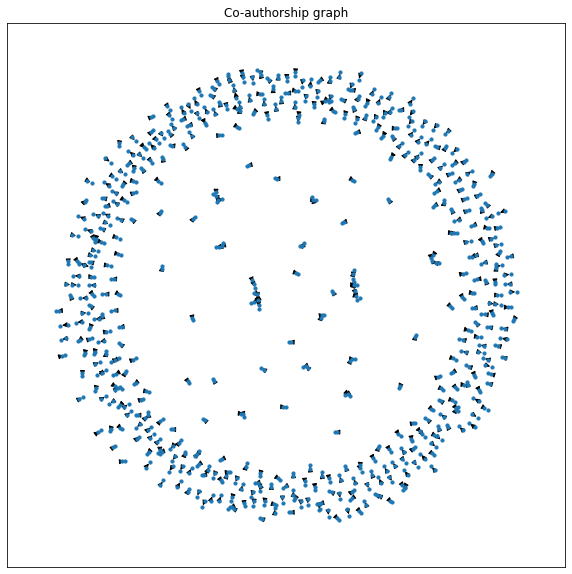

In [0]:
plt.rcParams["figure.figsize"] = (10,10)
#########################################################################################################
df_co_auth = graph.filterEdges("type=='Co-authorship'").edges.toPandas().sample(500) # df_auth_auth.toPandas().sample(500)
G = nx.from_pandas_edgelist(df_co_auth, source='src',target='dst',edge_attr=True)
nx.draw_networkx(G,arrows=True, with_labels=False, pos=nx.spring_layout(G), node_size=10, font_size=7)
#########################################################################################################
plt.title('Co-authorship graph')
plt.show()

**Random subgraph of Specializations**

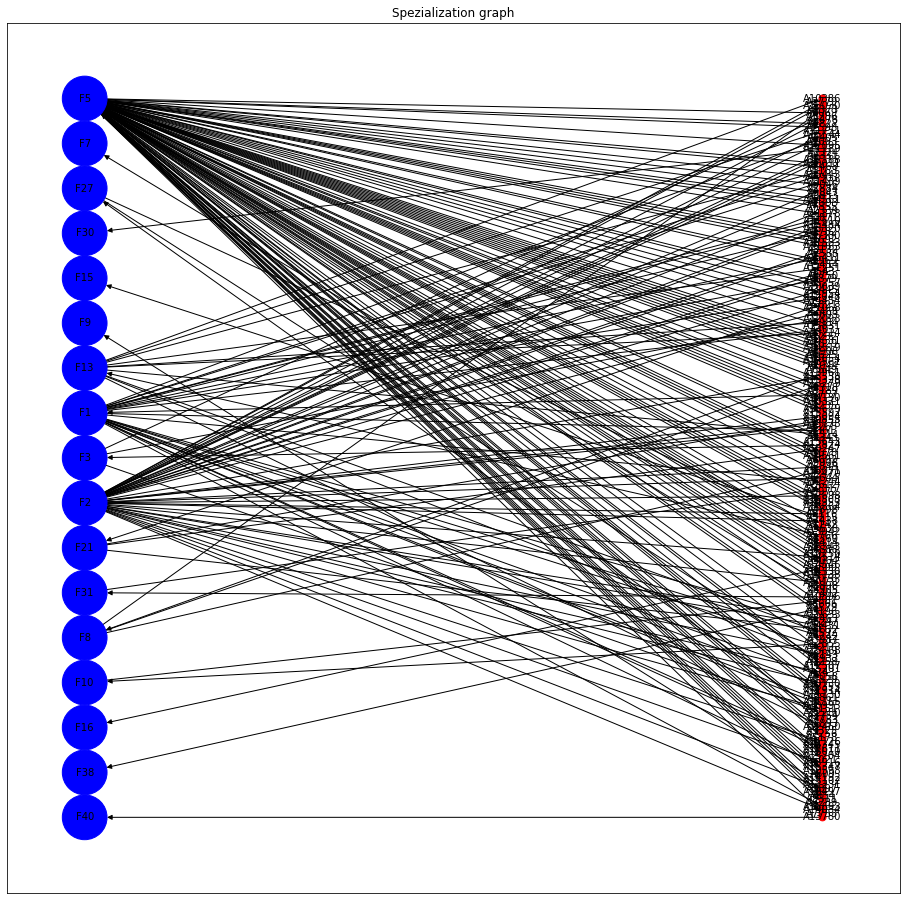

In [0]:
plt.rcParams["figure.figsize"] = (16,16)
#########################################################################################################
auth_fos = graph.filterEdges("type=='Specialization'").edges.toPandas().sample(200)
G = nx.from_pandas_edgelist(auth_fos, source='src',target='dst',edge_attr=True)
fosis = auth_fos["dst"].unique()
nodetypes = [node[0] for node in G.nodes()]
colors = ['red' if i=='A' else 'blue' for i in nodetypes]
sizes = [50 if i=='A' else 2000 for i in nodetypes]
nx.draw_networkx(G,arrows=True, with_labels=True, font_size=10, pos=nx.bipartite_layout(G,fosis), node_color=colors, node_size=sizes)
#########################################################################################################
plt.title('Spezialization graph')
plt.show()

**Random subgraph**

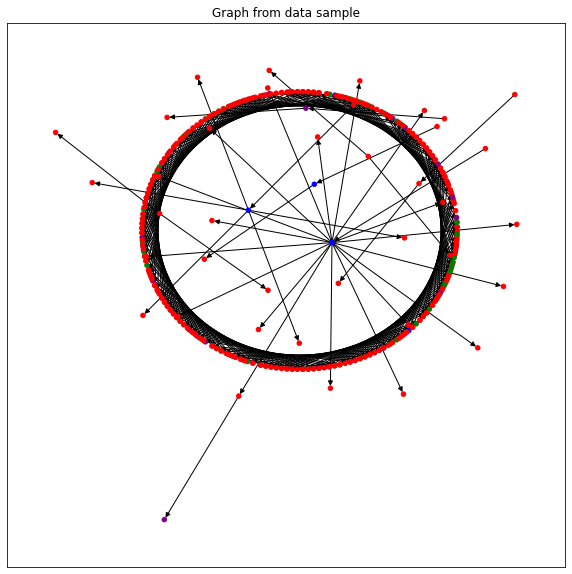

In [0]:
plt.rcParams["figure.figsize"] = (10,10)
#########################################################################################################
G = nx.from_pandas_edgelist(graph.edges.toPandas().sample(200), source='src',target='dst',edge_attr=True)
nodetypes = [node[0] for node in G.nodes()]
node2col = {'P': "green", "A": "red", "F": "blue", "V": "orange", "O": "purple"}
colors = [node2col[t] for t in nodetypes]
nx.draw_networkx(G,arrows=True, with_labels=False, font_size=10, pos=nx.kamada_kawai_layout(G), node_size=20, node_color=colors)
#########################################################################################################
plt.title('Graph from data sample')
plt.show()

### Motifs visualization

Here we visualize query results obtained above in the section 'Motifs finding'

**Author and its neighbours up to n hops**

In [0]:
N = 9
author = 'A5183'

nhops_df = (motifs_nhops
            .filter(F.col("a0.id")==author)
            .dropDuplicates()
            .withColumn("type", F.monotonically_increasing_id())
            )

nhops_df_reshaped = nhops_df.select("a0.id","a1.id","type")
for i in range(1,N): nhops_df_reshaped = nhops_df_reshaped.union(nhops_df.select(f"a{i}.id",f"a{i+1}.id","type"))
    
nhops = nhops_df_reshaped.filter(F.col("type")==0).toDF("src","dst","type").toPandas()


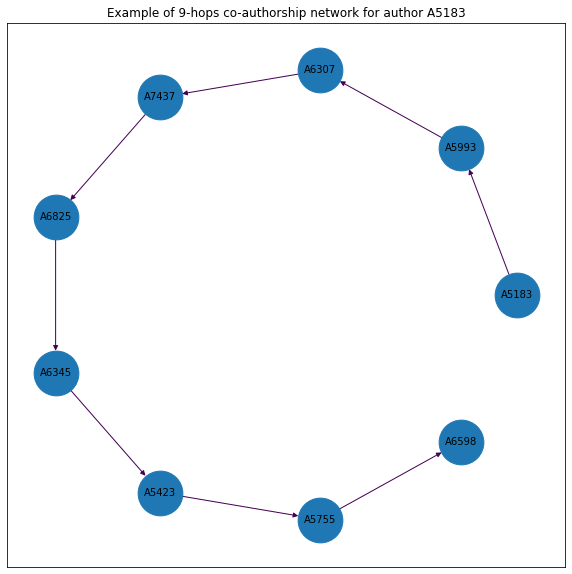

In [0]:
G = nx.from_pandas_edgelist(nhops, source='src',target='dst',edge_attr=True)
colors = nx.get_edge_attributes(G,'type').values()
nx.draw_networkx(G,arrows=True, with_labels=True, font_size=10, pos=nx.circular_layout(G), node_size=2000, edge_color=colors)
#########################################################################################################
plt.title(f'Example of {N}-hops co-authorship network for author {author}')
plt.show()

**Publication and its authors from different domains (field of studies)**

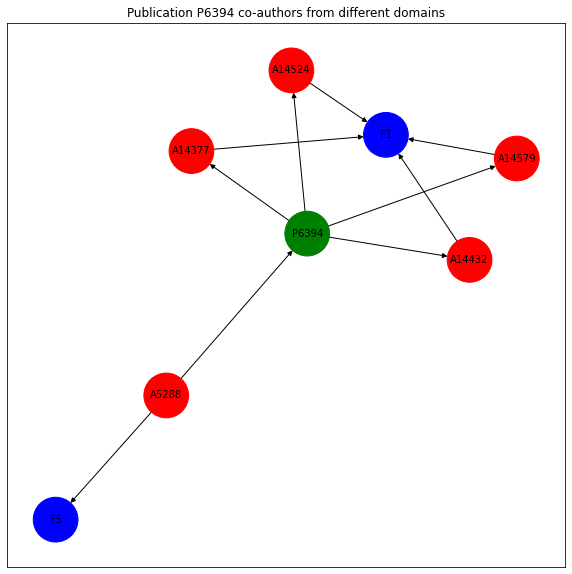

In [0]:
pub = 'P6394'
filtered_path = paths.filter(F.col("p1.id")==pub)

coauthored = (filtered_path
              .select("a1.id","p1.id")
                .union(filtered_path.select("a2.id","p2.id"))
                .union(filtered_path.select("a1.id","f1.id"))
                .union(filtered_path.select("a2.id","f2.id"))
                .dropDuplicates()
                .toDF("src","dst")
              )
plt.rcParams["figure.figsize"] = (10,10)
#########################################################################################################
G = nx.from_pandas_edgelist(coauthored.toPandas(),'src','dst')
nodetypes = [node[0] for node in G.nodes()]
node2col = {'P': "green", "A": "red", "F": "blue"}
colors = [node2col[t] for t in nodetypes]
nx.draw_networkx(G, arrows=True, with_labels = True,font_size=10, node_size=2000, node_color=colors)
#########################################################################################################
plt.title(f'Publication {pub} co-authors from different domains')
plt.show()

## Advanced step
We add a translation layer that receives a query like `[u:Person]-(o:Owns)->[c:Car]` and generates the corresponding query in PySpark that makes the query against the respective GraphFrame.

In [0]:
pattern_example = "(a:Author)-[e:]->(p:Publication)"
 
def pattern2pieces(pattern):
    v1 = pattern.split('-')[0][1:-1].split(':')[0]
    v1type = pattern.split('-')[0][1:-1].split(':')[1]
    if v1=="": v1 = 'x'

    e = pattern.split('-')[1][1:-1].split(':')[0]
    etype = pattern.split('-')[1][1:-1].split(':')[1]
    if e=="": e = 'y'

    v2 = pattern.split('-')[2][2:-1].split(':')[0]
    v2type = pattern.split('-')[2][2:-1].split(':')[1]
    if v2=="": v2 = 'z'

    return v1,v1type,e,etype,v2,v2type

pattern2pieces(pattern_example)

Out[27]: ('a', 'Author', 'e', '', 'p', 'Publication')

In [0]:
def pattern2query(pattern,graph):
    v1,v1type,e,etype,v2,v2type = pattern2pieces(pattern)
    p = "(" + v1 + ")-[" + e + "]->(" + v2 + ")"
    v1filter = v1 + ".type=='" + v1type + "'"
    if etype=="": efilter = v1filter
    else: efilter = e + ".type=='" + etype + "'"
    v2filter = v2 + ".type=='" + v2type + "'"
    motif = graph.find(p).filter(v1filter).filter(efilter).filter(v2filter)
    return motif

In [0]:
"""
Minimal patterns: (:'type')-[:]->(:'type') or [:'type']-(:)->[:'type']
"""
pattern_example2 = "(:Author)-[:]->(:Publication)"
display(pattern2query(pattern_example2,graph))

x y z List(A5181, Cavan Reilly, Author) List(A5181, P2693, Authorship, 11) List(P2693, Weighted Classical Variogram Estimation for Data With Clustering, Publication) List(A5182, Elin Palm, Author) List(A5182, P3202, Authorship, 11) List(P3202, Rights that trump: Surveillance-based migration governance and a substantial right to mobility., Publication) List(A5183, Jackie Chen, Author) List(A5183, P3109, Authorship, 3) List(P3109, ISOBAR Preconditioner for Effective and High-throughput Lossless Data Compression, Publication) List(A5184, Changle Li, Author) List(A5184, P3373, Authorship, 6) List(P3373, An effective routing protocol for intermittently connected vehicular ad hoc networks, Publication) List(A5185, Farhad Arbab, Author) List(A5185, P2905, Authorship, 6) List(P2905, Connectors as Designs, Publication) List(A5186, Vinod Pangracious, Author) List(A5186, P2708, Authorship, 11) List(P2708, Exploration environment for 3D heterogeneous tree-based FPGA architectures (3D HT-FPGA)., Publication) List(A5187, Pedro Rangel Henriques, Author) List(A5187, P3489, Authorship, 6) List(P3489, Contract-Based Slicing, Publication) List(A5188, Feel-Soon Kang, Author) List(A5188, P3434, Authorship, 11) List(P3434, An Efficient Multilevel-Synthesis Approach and Its Application to a 27-Level Inverter, Publication) List(A5189, Yinfang Zhuang, Author) List(A5189, P2697, Authorship, 11) List(P2697, Measuring the Effectiveness of Hierarchical Address Assignment, Publication) List(A5190, Micha A. Perles, Author) List(A5190, P3136, Authorship, 11) List(P3136, A property of graphs of convex polytopes, Publication) List(A5191, Angela Scheller, Author) List(A5191, P2632, Authorship, 3) List(P2632, PENGUIN: DAVIC and the WWW in Coexistence, Publication) List(A5192, Phil Diamond, Author) List(A5192, P2590, Authorship, 11) List(P2590, Bishadowing and Hyperbolicity, Publication) List(A5193, Ronghai Hu, Author) List(A5193, P3076, Authorship, 4) List(P3076, A portable Multi-Angle Observation System, Publication) List(A5194, Matthias Moi, Author) List(A5194, P3224, Authorship, 6) List(P3224, Artefact-Actor-Networks as tie between social networks and artefact networks, Publication) List(A5195, Morton Abramson, Author) List(A5195, P3327, Authorship, 11) List(P3327, A note on permutations with fixed pattern, Publication) List(A5196, Yu-Ming Chang, Author) List(A5196, P3183, Authorship, 11) List(P3183, A disturb-alleviation scheme for 3D flash memory, Publication) List(A5197, Udo Hahn, Author) List(A5197, P2563, Authorship, 11) List(P2563, Bridging Textual Ellipses, Publication) List(A5198, Christos Davatzikos, Author) List(A5198, P2538, Authorship, 3) List(P2538, Measuring Brain Lesion Progression with a Supervised Tissue Classification System, Publication) List(A5199, Guillermo Ayala, Author) List(A5199, P3166, Authorship, 6) List(P3166, Accurate Detection and Characterization of Corner Points Using Circular Statistics and Fuzzy Clustering, Publication) List(A5200, David Swarbreck, Author) List(A5200, P2785, Authorship, 11) List(P2785, The Arabidopsis Information Resource (TAIR): gene structure and function annotation., Publication) List(A5201, James Reed, Author) List(A5201, P3222, Authorship, 11) List(P3222, Contextual Android education, Publication) List(A5202, Bernhard Fisseni, Author) List(A5202, P2814, Authorship, 6) List(P2814, The naproche project controlled natural language proof checking of mathematical texts, Publication) List(A5203, michael elad, Author) List(A5203, P3256, Authorship, 11) List(P3256, Recursive Optical Flow Estimation—Adaptive Filtering Approach, Publication) List(A5204, M.B. Aryanezhad, Author) List(A5204, P3306, Authorship, 11) List(P3306, A new genetic algorithm for solving nonconvex nonlinear programming problems, Publication) List(A5205, Kimberly Kluckman, Author) List(A5205, P3189, Authorship, 3) List(P3189, Blastocyst microinjection automation, Publication) List(A5206, Makoto Koshino, Author) List(A5206, P3270, Authorship, 6

## Graph Algorithms

#### Pagerank

**The most influential papers by means of citations**

In [0]:
citation_graph = graph.filterEdges("type == 'Cites'").dropIsolatedVertices()
citation_pagerank = citation_graph.pageRank(resetProbability=0.15, maxIter=5)
display(citation_pagerank.vertices)

id name type pagerank P2501 Case-Based Recommendation Publication 0.943183914859794 P2530 Comparing Non-parametric Ensemble Methods for Document Clustering Publication 0.5098291431674563 P2577 Debugging Heterogeneous Distributed Systems Using Event-Based Models of Behavior Publication 1.3115354707982811 P2578 Blank digital signatures Publication 0.5098291431674563 P2583 Cooperative assembly systems Publication 0.5098291431674563 P2598 A constant update time finger search tree Publication 3.3988609544497086 P2603 Reusing Software: Issues and Research Directions Publication 0.5098291431674563 P2623 The method of fundamental solutions and condition number analysis for inverse problems of Laplace equation Publication 0.5098291431674563 P2627 Robust Synchronization in Markov Decision Processes. Publication 0.5098291431674563 P2631 Broadband CDMA techniques Publication 0.943183914859794 P2650 Bayesian cluster ensembles Publication 0.943183914859794 P2662 Context and Supercontext Publication 0.5098291431674563 P2688 Using OBDDs for Efficient Query Evaluation on Probabilistic Databases Publication 0.5098291431674563 P2713 Component-based semantics Publication 0.5098291431674563 P2734 Efficient Walking Speed Optimization of a Humanoid Robot Publication 0.5098291431674563 P2741 Shape Descriptors for Classication of Functional Data Publication 0.5098291431674563 P2788 Bibliography on cyclostationarity Publication 0.5098291431674563 P2809 Signal selective localization of nonGaussian cyclostationary sources Publication 0.7265065290136252 P2818 Boolean Concept Logic Publication 0.943183914859794 P2825 A programming model for active documents Publication 0.5098291431674563 P2826 Completeness by Forcing Publication 0.943183914859794 P2837 A Holonic Component-Based Approach to Reconfigurable Manufacturing Control Architecture Publication 0.943183914859794 P2871 Clusters and semimatroids Publication 0.943183914859794 P2880 Bottom-Up argumentation Publication 0.5098291431674563 P2887 Variable-rate punctured convolutional coding over fading mobile communication channels Publication 0.5098291431674563 P2893 Optimal mapping of neural-network learning on message-passing multicomputers Publication 0.943183914859794 P2895 Cross-language information retrieval: the way ahead Publication 0.943183914859794 P2902 Focused simulated annealing search: An application to job shop scheduling Publication 0.943183914859794 P2931 Bayesian face recognition Publication 0.943183914859794 P2937 Binary Component Adaptation Publication 0.5098291431674563 P2938 Semi-active vibration isolation control using dual heuristic dynamic programming. Publication 0.5098291431674563 P2950 BladeCenter thermal diagnostics Publication 0.5098291431674563 P2955 Build-Level Components Publication 0.943183914859794 P2958 The method of fundamental solutions for elliptic boundary value problems Publication 0.943183914859794 P2993 Byzantine Quorum Systems Publication 0.5098291431674563 P2995 Rough sets in perception-based computing Publication 0.943183914859794 P3038 Bioinspired visuomotor convergence Publication 0.5098291431674563 P3089 On the Solvability of Anonymous Partial Grids Exploration by Mobile Robots Publication 0.943183914859794 P3106 Parametric stereo extension of ITU-T G.722 based on a new downmixing scheme Publication 0.943183914859794 P3145 Integrated symbol table, engine and heap memory management in multi-engine prolog Publication 0.5098291431674563 P3146 A Criterion of Comparison Between two Case Bases Publication 0.943183914859794 P3148 Clutters and matroids Publication 0.5098291431674563 P3170 Normal Correction towards Smoothing Point-Based Surfaces. Publication 0.5098291431674563 P3171 Blocking optimal arborescences Publication 0.5098291431674563 P3188 Discussions of worker ants' rule-based CHC dealing with changing environments Publication 0.5098291431674563 P3205 Combining abstract interpreters Publication 0.943183914859794 P3223 Clustering by compression Publication 1

**The most influential authors in our network**

In [0]:
co_auth_graph = graph.filterEdges("type == 'Co-authorship'").dropIsolatedVertices()
co_authorship_pagerank = co_auth_graph.pageRank(resetProbability=0.15, maxIter=5)
display(co_authorship_pagerank.vertices)

id name type pagerank A5181 Cavan Reilly Author 1.000000000000001 A5183 Jackie Chen Author 1.0000000000000013 A5184 Changle Li Author 1.000000000000001 A5185 Farhad Arbab Author 1.000000000000001 A5186 Vinod Pangracious Author 1.000000000000001 A5187 Pedro Rangel Henriques Author 1.000000000000001 A5188 Feel-Soon Kang Author 1.000000000000001 A5189 Yinfang Zhuang Author 1.000000000000001 A5190 Micha A. Perles Author 1.000000000000001 A5191 Angela Scheller Author 1.000000000000001 A5192 Phil Diamond Author 1.000000000000001 A5193 Ronghai Hu Author 1.000000000000001 A5194 Matthias Moi Author 1.000000000000001 A5196 Yu-Ming Chang Author 1.000000000000001 A5197 Udo Hahn Author 1.000000000000001 A5198 Christos Davatzikos Author 1.000000000000001 A5199 Guillermo Ayala Author 1.000000000000001 A5200 David Swarbreck Author 1.0000000000000009 A5201 James Reed Author 1.000000000000001 A5202 Bernhard Fisseni Author 1.000000000000001 A5203 michael elad Author 1.000000000000001 A5204 M.B. Aryanezhad Author 1.000000000000001 A5205 Kimberly Kluckman Author 1.000000000000001 A5206 Makoto Koshino Author 1.000000000000001 A5207 Liyuan Li Author 0.9074557640071659 A5208 Guohong Cao Author 1.000000000000001 A5209 Hiroshi Matsuura Author 1.000000000000001 A5210 Lehel Csato Author 1.000000000000001 A5211 Debe Bednarchak Author 1.000000000000001 A5213 Boris Kiryutin Author 1.000000000000001 A5214 Kevin Templer Author 1.000000000000001 A5216 Satoshi Fujita Author 1.000000000000001 A5218 Sylvain Lazard Author 1.000000000000001 A5219 Johannes Geiselmann Author 1.000000000000001 A5220 Andrew Gelman Author 1.000000000000001 A5221 Sheila A. Greibach Author 1.000000000000001 A5222 Anil Kumar Ghosh Author 1.000000000000001 A5223 Michael Brady Author 1.000000000000001 A5224 Xin Wang Author 1.000000000000001 A5225 Laura Micconi Author 1.000000000000001 A5226 Taiichi Yuasa Author 1.000000000000001 A5227 Horacio Samaniego Author 1.000000000000001 A5228 Guang Gong Author 1.000000000000001 A5229 Huiwen Chang Author 1.000000000000001 A5230 Philippe Pinaud Author 1.000000000000001 A5231 Larry Ploetz Author 1.0000000000000009 A5232 Toshio Ito Author 1.000000000000001 A5233 Tao Yang Author 1.000000000000001 A5234 Rokia Missaoui Author 1.000000000000001 A5235 Xiaoling Sun Author 1.000000000000001 A5236 N. H. Othman Author 1.000000000000001 A5237 Yasuhiro Akagi Author 1.000000000000001 A5238 Laura Bright Author 1.000000000000001 A5239 Juan M. Estevez-Tapiador Author 1.000000000000001 A5240 Eric Wilcox Author 1.000000000000001 A5241 Collin McMillan Author 1.000000000000001 A5242 T. J. Mullins Author 1.0559628402751704 A5243 Stefano De Sabbata Author 1.000000000000001 A5245 Marinette Revenu Author 1.000000000000001 A5246 Christoph Friedrich Author 1.000000000000001 A5247 Kenji Tanaka Author 1.5551341767684967 A5248 Stefan Trausan-Matu Author 1.000000000000001 A5249 Carmen Morgado Author 1.000000000000001 A5250 Wenjie He Author 1.000000000000001 A5252 Gorshe, S. Author 1.2337040383735323 A5253 Nazatul Aini Abd Majid Author 1.000000000000001 A5255 Zheshen Wang Author 1.000000000000001 A5256 Jun Heo Author 1.000000000000001 A5257 Su Ruan Author 1.000000000000001 A5258 A. Mian Author 1.000000000000001 A5259 Carla Dionisi Author 1.000000000000001 A5260 Michael M. Kostreva Author 1.000000000000001 A5262 Cal Collins Author 1.000000000000001 A5263 Timothy D. Tuttle Author 1.000000000000001 A5264 Twan Basten Author 1.000000000000001 A5265 Eitan Altman Author 1.6633240625000014 A5266 M. K. Lim Author 1.000000000000001 A5267 Massimo Melucci Author 1.000000000000001 A5268 Mario Di Francesco Author 0.8938462464237223 A5269 Zhenbo Li Author 1.000000000000001 A5271 Pasko, G. Author 1.000000000000001 A5272 James Andreoni Author 1.000000000000001 A5273 Seyed Mohammadreza Mohades Kasaei Author 1.000000000000001 A5274 Imtiaz Ahmed Khan Author 0.9673773257493093 A5277 Wenqiu Zhu Author 1.000000000000001 A5278 Ali Mili Author 0.6566113367151338 A5279 Kenneth C. Sevcik Author 1.00000000000000

#### Communities

Good example: https://docs.databricks.com/spark/latest/graph-analysis/graphframes/user-guide-python.html

**Strongly connected components in co-authorship relationships**

In [0]:
sc.setCheckpointDir("/tmp/graphframes-example-connected-components")
coauth_graph = graph.filterEdges("type == 'Co-authorship'").dropIsolatedVertices()
coauth_components = coauth_graph.stronglyConnectedComponents(maxIter=5)
display(coauth_components)

id name type component A5181 Cavan Reilly Author 1095 A5183 Jackie Chen Author 1089 A5184 Changle Li Author 8589935796 A5185 Farhad Arbab Author 8589935626 A5186 Vinod Pangracious Author 1090 A5187 Pedro Rangel Henriques Author 34359739569 A5188 Feel-Soon Kang Author 8589935931 A5189 Yinfang Zhuang Author 8589935627 A5190 Micha A. Perles Author 1091 A5191 Angela Scheller Author 8589935828 A5192 Phil Diamond Author 25769805192 A5193 Ronghai Hu Author 25769805061 A5194 Matthias Moi Author 1092 A5196 Yu-Ming Chang Author 1419 A5197 Udo Hahn Author 34359739502 A5198 Christos Davatzikos Author 17179870576 A5199 Guillermo Ayala Author 1355 A5200 David Swarbreck Author 1125 A5201 James Reed Author 34359739504 A5202 Bernhard Fisseni Author 1340 A5203 michael elad Author 17179870286 A5204 M.B. Aryanezhad Author 34359739505 A5205 Kimberly Kluckman Author 1314 A5206 Makoto Koshino Author 25769805181 A5207 Liyuan Li Author 31 A5208 Guohong Cao Author 1093 A5209 Hiroshi Matsuura Author 1167 A5210 Lehel Csato Author 34359739507 A5211 Debe Bednarchak Author 8589935930 A5213 Boris Kiryutin Author 1299 A5214 Kevin Templer Author 8589935933 A5216 Satoshi Fujita Author 1118 A5218 Sylvain Lazard Author 17179870332 A5219 Johannes Geiselmann Author 8589935863 A5220 Andrew Gelman Author 1095 A5221 Sheila A. Greibach Author 34359739510 A5222 Anil Kumar Ghosh Author 25769804899 A5223 Michael Brady Author 8589935688 A5224 Xin Wang Author 8589935796 A5225 Laura Micconi Author 1354 A5226 Taiichi Yuasa Author 17179870425 A5227 Horacio Samaniego Author 8589935700 A5228 Guang Gong Author 17179870365 A5229 Huiwen Chang Author 1208 A5230 Philippe Pinaud Author 8589935862 A5231 Larry Ploetz Author 1125 A5232 Toshio Ito Author 1341 A5233 Tao Yang Author 17179870436 A5234 Rokia Missaoui Author 1176 A5235 Xiaoling Sun Author 42949674083 A5236 N. H. Othman Author 1096 A5237 Yasuhiro Akagi Author 8589935922 A5238 Laura Bright Author 1286 A5239 Juan M. Estevez-Tapiador Author 17179870288 A5240 Eric Wilcox Author 34359739528 A5241 Collin McMillan Author 1097 A5242 T. J. Mullins Author 1333 A5243 Stefano De Sabbata Author 17179870489 A5245 Marinette Revenu Author 1127 A5246 Christoph Friedrich Author 1143 A5247 Kenji Tanaka Author 1098 A5248 Stefan Trausan-Matu Author 1300 A5249 Carmen Morgado Author 51539608678 A5250 Wenjie He Author 34359739516 A5252 Gorshe, S. Author 1149 A5253 Nazatul Aini Abd Majid Author 8589935658 A5255 Zheshen Wang Author 1099 A5256 Jun Heo Author 8589935674 A5257 Su Ruan Author 1127 A5258 A. Mian Author 1285 A5259 Carla Dionisi Author 34359739517 A5260 Michael M. Kostreva Author 25769805132 A5262 Cal Collins Author 17179870291 A5263 Timothy D. Tuttle Author 1100 A5264 Twan Basten Author 1295 A5265 Eitan Altman Author 1375 A5266 M. K. Lim Author 17179870292 A5267 Massimo Melucci Author 25769804914 A5268 Mario Di Francesco Author 83 A5269 Zhenbo Li Author 1101 A5271 Pasko, G. Author 1177 A5272 James Andreoni Author 42949674352 A5273 Seyed Mohammadreza Mohades Kasaei Author 1102 A5274 Imtiaz Ahmed Khan Author 1148 A5277 Wenqiu Zhu Author 1103 A5278 Ali Mili Author 8589936210 A5279 Kenneth C. Sevcik Author 34359739558 A5280 mingyi ju Author 17179870339 A5281 Yixue Li Author 8589935864 A5282 Marc Vilain Author 17179870363 A5284 M. Day Author 8589935637 A5286 Chenggang Zhang Author 8589935653 A5287 Jianguo Qian Author 8589935844 A5288 Martin Rinard Author 1104 A5289 Yan Huang Author 17179870412 A5290 Hongmei Yang Author 1106 A5291 Donald D. Eisenstein Author 8589935638 A5292 Fredy Ruiz Author 8589935639 A5293 Angela Caicedo Author 1369 A5295 Jin-Siang Syu Author 8589935726 A5296 P. J. Nahin Author 34359739774 A5297 Umberto Villano Author 8589935883 A5298 Michael Salisbury Author 1226 A5299 Claudia Ceppi Author 1257 A5300 Yoash Levron Author 1107 A5301 Min Cao Author 83 A5302 Ronald Ham Author 8589935673 A5303 David Jacobs Author 1108 A5304 Piergiorgio Svaizer Author 1242 A5305 Myoung-Wan Koo Author 8589935802 A5306 Hongyue Dai Author 8589935864 A53

**Strongly connected components for being member of the same scientific domain**

In [0]:
samefos_graph = graph.filterEdges("type == 'Specialization'").dropIsolatedVertices()
samefos_components = samefos_graph.stronglyConnectedComponents(maxIter=5)
display(samefos_components)

id name type component A5181 Cavan Reilly Author 42949673895 A5182 Elin Palm Author 60129543084 A5183 Jackie Chen Author 917 A5184 Changle Li Author 17179870147 A5185 Farhad Arbab Author 8589935486 A5186 Vinod Pangracious Author 918 A5187 Pedro Rangel Henriques Author 60129543085 A5188 Feel-Soon Kang Author 25769804725 A5189 Yinfang Zhuang Author 8589935487 A5190 Micha A. Perles Author 919 A5191 Angela Scheller Author 42949673896 A5192 Phil Diamond Author 34359739305 A5193 Ronghai Hu Author 60129543086 A5194 Matthias Moi Author 920 A5195 Morton Abramson Author 34359739306 A5196 Yu-Ming Chang Author 17179870148 A5197 Udo Hahn Author 34359739307 A5198 Christos Davatzikos Author 60129543087 A5199 Guillermo Ayala Author 34359739308 A5200 David Swarbreck Author 42949673897 A5201 James Reed Author 34359739309 A5202 Bernhard Fisseni Author 17179870149 A5203 michael elad Author 17179870150 A5204 M.B. Aryanezhad Author 34359739310 A5205 Kimberly Kluckman Author 25769804726 A5207 Liyuan Li Author 34359739311 A5208 Guohong Cao Author 921 A5209 Hiroshi Matsuura Author 25769804727 A5210 Lehel Csato Author 34359739312 A5211 Debe Bednarchak Author 60129543088 A5212 P Vaderlind Author 922 A5213 Boris Kiryutin Author 8589935488 A5214 Kevin Templer Author 60129543089 A5215 Dmitriy Garmatyuk Author 25769804728 A5216 Satoshi Fujita Author 34359739313 A5217 Sudhanshu Sekhar Panda Author 34359739314 A5218 Sylvain Lazard Author 34359739315 A5219 Johannes Geiselmann Author 42949673898 A5220 Andrew Gelman Author 923 A5221 Sheila A. Greibach Author 34359739316 A5222 Anil Kumar Ghosh Author 25769804729 A5224 Xin Wang Author 34359739317 A5225 Laura Micconi Author 8589935490 A5226 Taiichi Yuasa Author 60129543090 A5227 Horacio Samaniego Author 42949673899 A5228 Guang Gong Author 51539608490 A5229 Huiwen Chang Author 25769804730 A5230 Philippe Pinaud Author 25769804731 A5231 Larry Ploetz Author 8589935491 A5232 Toshio Ito Author 17179870151 A5233 Tao Yang Author 34359739318 A5234 Rokia Missaoui Author 8589935492 A5235 Xiaoling Sun Author 60129543091 A5236 N. H. Othman Author 924 A5237 Yasuhiro Akagi Author 25769804732 A5238 Laura Bright Author 51539608491 A5239 Juan M. Estevez-Tapiador Author 17179870152 A5240 Eric Wilcox Author 42949673900 A5241 Collin McMillan Author 925 A5242 T. J. Mullins Author 34359739319 A5243 Stefano De Sabbata Author 34359739320 A5245 Marinette Revenu Author 51539608492 A5246 Christoph Friedrich Author 17179870153 A5247 Kenji Tanaka Author 926 A5248 Stefan Trausan-Matu Author 51539608493 A5249 Carmen Morgado Author 60129543092 A5250 Wenjie He Author 34359739321 A5251 P.D. Johnson Author 17179870154 A5252 Gorshe, S. Author 60129543093 A5253 Nazatul Aini Abd Majid Author 60129543094 A5254 Jerome M. Kurtzberg Author 51539608494 A5255 Zheshen Wang Author 927 A5256 Jun Heo Author 17179870155 A5257 Su Ruan Author 60129543095 A5258 A. Mian Author 8589935493 A5259 Carla Dionisi Author 34359739322 A5260 Michael M. Kostreva Author 42949673901 A5261 Apinunt Thanachayanont Author 928 A5262 Cal Collins Author 17179870156 A5263 Timothy D. Tuttle Author 929 A5264 Twan Basten Author 25769804733 A5265 Eitan Altman Author 51539608495 A5266 M. K. Lim Author 17179870157 A5267 Massimo Melucci Author 51539608496 A5268 Mario Di Francesco Author 51539608497 A5269 Zhenbo Li Author 930 A5270 Peter Bates Author 931 A5271 Pasko, G. Author 17179870158 A5272 James Andreoni Author 60129543096 A5273 Seyed Mohammadreza Mohades Kasaei Author 932 A5274 Imtiaz Ahmed Khan Author 8589935494 A5275 Byungtae Seo Author 17179870159 A5277 Wenqiu Zhu Author 933 A5278 Ali Mili Author 17179870160 A5279 Kenneth C. Sevcik Author 42949673902 A5280 mingyi ju Author 51539608498 A5281 Yixue Li Author 42949673903 A5282 Marc Vilain Author 25769804735 A5283 V. P. Srini Author 8589935495 A5284 M. Day Author 8589935496 A5285 Richard A. Reyment Author 60129543097 A5286 Chenggang Zhang Author 60129543098 A5287 Jianguo Qian Author 34359739323 A5288 Martin Rinard Author 934 A5289 Yan Huang 

**Giant component of co-authorship subgraph**

In [0]:
display(coauth_components.groupBy("component").count().orderBy("count",ascending=False))

component count 31 66 796 54 550 44 378 35 751 32 642 24 282 23 30 22 1320 18 8589936183 18 428 18 1125 16 500 16 337 16 8589935025 16 803 15 394 15 416 15 970 15 474 15 720 15 688 14 364 14 758 14 83 13 652 13 299 13 1433 13 8589935106 13 1521 13 8589934608 13 65 13 1694 13 702 13 1229 13 955 13 1242 13 1121 12 8589935124 12 17179870312 12 1231 12 1595 12 707 12 517 11 204 11 1063 11 1508 11 684 11 572 11 1202 11 1671 11 68 11 1207 11 750 11 844 11 17179869396 11 25769804923 11 1388 11 704 10 1577 10 583 10 988 10 1007 10 8589935008 10 1333 10 1403 10 8589935621 10 1006 10 717 10 691 10 1089 10 293 10 721 9 1226 9 1134 9 1503 9 884 9 932 9 34 9 1281 9 1464 9 165 9 800 9 1331 9 886 9 950 9 1426 9 977 9 1514 9 479 9 683 9 1085 9 1156 9 1441 9 8589935242 9 8589935110 9 8589935453 9 8589935777 9 8589935620 9 8589935864 9 17179869426 9 17179869502 9 17179869759 9 8589936031 9 624 9 8589935252 9 604 8 806 8 1305 8 384 8 1511 8 1533 8 38 8 72 8 1098 8 563 8 1596 8 8589934875 8 8589935183 8 8589935031 8 8589934648 8 8589934702 8 8589935551 8 8589935235 8 8589935126 8 8589934705 8 8589934774 8 8589936001 8 17179870130 8 17179870323 8 701 8 17179870272 8 25769804432 8 931 8 17179869644 8 1221 8 8589934682 8 11 8 59 8 99 8 288 8 879 8 620 8 696 8 923 8 1128 8 1148 8 1241 8 1360 8 508 8 397 8 697 8 1474 8 230 8 900 8 871 7 1543 7 726 7 734 7 1277 7 421 7 100 7 247 7 754 7 1104 7 1342 7 1389 7 1115 7 1453 7 1538 7 105 7 143 7 314 7 492 7 597 7 1139 7 678 7 742 7 1275 7 1443 7 1622 7 5 7 433 7 1256 7 728 7 1384 7 1658 7 423 7 902 7 1120 7 386 7 1600 7 1677 7 452 7 311 7 578 7 586 7 1218 7 645 7 1498 7 8589935156 7 8589935266 7 8589936160 7 191 7 8589935704 7 8589934622 7 8589934766 7 8589935806 7 8589934876 7 407 7 8589935733 7 8589934991 7 8589935133 7 8589936210 7 8589935973 7 8589935238 7 8589935478 7 8589935724 7 8589935764 7 8589936221 7 8589935977 7 17179869466 7 695 7 8589934948 7 17179870355 7 17179870167 7 17179870559 7 17179869696 7 17179870363 7 8589936073 7 17179869694 7 25769804553 7 8589936163 7 34359738692 7 17179869812 7 25769805378 7 1480 7 1013 6 1055 6 8589935670 6 1127 6 1035 6 594 6 1173 6 1682 6 1219 6 878 6 593 6 1304 6 711 6 1158 6 557 6 1697 6 980 6 1290 6 1571 6 8589935402 6 8589935546 6 8589936219 6 8589935978 6 8589935309 6 8589934815 6 8589935011 6 8589935687 6 709 6 17179869231 6 8589936116 6 17179869278 6 25769803861 6 25769804875 6 208 6 841 6 769 6 912 6 1688 6 264 6 310 6 1101 6 1313 6 1404 6 1462 6 8 6 19 6 315 6 549 6 592 6 837 6 1109 6 1696 6 108 6 239 6 308 6 891 6 940 6 1528 6 64 6 136 6 199 6 49 6 1135 6 1166 6 1257 6 1297 6 2 6 122 6 1695 6 1717 6 8589936038 6 8589935790 6 8589934709 6 8589935624 6 8589935919 6 8589936204 6 8589935257 6 8589935307 6 8589935622 6 8589935088 6 8589935560 6 8589934864 6 8589935297 6 8589935410 6 8589936124 6 8589935330 6 17179869806 6 17179869960 6 17179869604 6 17179870180 6 17179870064 6 17179870339 6 17179869304 6 17179869302 6 17179869414 6 25769805087 6 17179869770 6 25769804170 6 25769804193 6 42949673446 6 25769804928 6 42949673416 6 724 6 91 6 1575 6 1340 6 890 6 55 6 368 6 906 6 969 6 759 6 700 6 8589935758 5 8589935922 5 17179869317 5 8589936083 5 8589935809 5 1378 5 25769804413 5 8589936097 5 8589935938 5 8589934877 5 17179869263 5 17179870019 5 17179869952 5 25769804485 5 25769805477 5 8589934869 5 8589936168 5 8589935975 5 8589936015 5 8589934624 5 149 5 8589935331 5 17179869267 5 17179869393 5 17179870032 5 17179869230 5 17179870101 5 17179870332 5 25769804728 5 25769804850 5 34359738646 5 34359738717 5 8589934983 5 8589935412 5 518 5 8589934801 5 437 5 729 5 8589936209 5 555 5 822 5 8589934615 5 8589934630 5 8589935395 5 8589936009 5 1210 5 577 5 17179869534 5 17179870021 5 17179870087 5 17179869919 5 1456 5 17179870324 5 17179869986 5 17179869236 5 17179870755 5 25769804730 5 25769804931 5 25769804777 5 25769803844 5 34359739737 5 34359739054 5 34359738959 5 42949673793 5 184 5 836 5 1341 5 78 5 8589935233 5 8589934735 5 8589934994 5 8589935531 5 638 5 

In [0]:
giant_auth = coauth_components.filter(F.col("component")==31).select("id","name")
co_auth_subgraph = graph.filterEdges("type=='Co-authorship'").dropIsolatedVertices()
co_auth_edges = co_auth_subgraph.edges

co_src = co_auth_edges.join(giant_auth, co_auth_edges.src==giant_auth.id)
co_dst = co_auth_edges.join(giant_auth, co_auth_edges.dst==giant_auth.id)
giant_co_auth = co_src.union(co_dst).dropDuplicates()
giant_df = giant_co_auth.toPandas()

In [0]:
giant_df

src 
 dst 
 type 
 rank 
 id 
 name 
 
 
 
 
 0 
 A5207 
 A6092 
 Co-authorship 
 1 
 A5207 
 Liyuan Li 
 
 
 1 
 A6092 
 A12 
 Co-authorship 
 1 
 A6092 
 Yeow Kee Tan 
 
 
 2 
 A6963 
 A12 
 Co-authorship 
 1 
 A6963 
 Haizhou Li 
 
 
 3 
 A7252 
 A6963 
 Co-authorship 
 1 
 A7252 
 Xinguo Yu 
 
 
 4 
 A9064 
 A10074 
 Co-authorship 
 1 
 A9064 
 Yong Ge 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 579 
 A6607 
 A14161 
 Co-authorship 
 1 
 A14161 
 Bo Liu 
 
 
 580 
 A13858 
 A14456 
 Co-authorship 
 1 
 A14456 
 Christian S. Jensen 
 
 
 581 
 A5060 
 A13847 
 Co-authorship 
 1 
 A13847 
 Yuan Yuan 
 
 
 582 
 A14456 
 A13858 
 Co-authorship 
 1 
 A13858 
 Richard T. Snodgrass 
 
 
 583 
 A14038 
 A14456 
 Co-authorship 
 1 
 A14456 
 Christian S. Jensen 
 
 
 
 584 rows × 6 columns

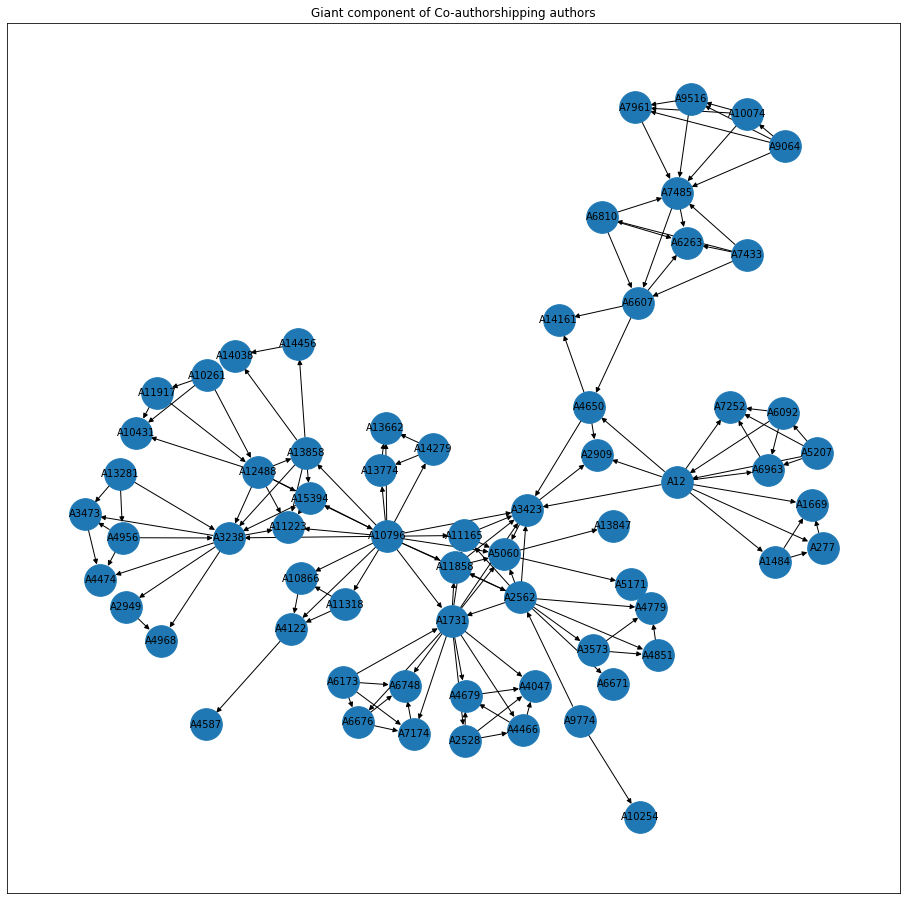

In [0]:
plt.rcParams["figure.figsize"] = (16,16)
#########################################################################################################
G = nx.from_pandas_edgelist(giant_df, source='src',target='dst',edge_attr=True)
nx.draw_networkx(G,arrows=True, with_labels=True, font_size=10, pos=nx.kamada_kawai_layout(G), node_size=1000)
#########################################################################################################
plt.title('Giant component of Co-authorshipping authors')
plt.show()